# Electricity Consumption Based On Weather Data

This data is sourced from kaggle.com. In this notebook I will do a cleaning data and an EDA before visualisation.

Each row represents one day. Column description:
- date - Date of observation
- AWND - Average Daily Wind Speed (m/s)
- PRCP - Daily Precipitation (mm)
- TMAX - Daily Maximum temperature (in Celsius degrees)
- TMIN - Daily Minimum temperature (in Celsius degrees)

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [211]:
df = pd.read_csv('electricity_consumption_based_weather_dataset.csv')

In [212]:
df.head()

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
0,2006-12-16,2.5,0.0,10.6,5.0,1209.176
1,2006-12-17,2.6,0.0,13.3,5.6,3390.460
2,2006-12-18,2.4,0.0,15.0,6.7,2203.826
3,2006-12-19,2.4,0.0,7.2,2.2,1666.194
4,2006-12-20,2.4,0.0,7.2,1.1,2225.748


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1433 non-null   object 
 1   AWND               1418 non-null   float64
 2   PRCP               1433 non-null   float64
 3   TMAX               1433 non-null   float64
 4   TMIN               1433 non-null   float64
 5   daily_consumption  1433 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.3+ KB


In [214]:
df.describe(include='all')

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
count,1433,1418.000000,1433.000000,1433.000000,1433.000000,1433.000000
unique,1433,NaN,NaN,NaN,NaN,NaN
top,2006-12-16,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.642313,3.800488,17.187509,9.141242,1561.078061
std,NaN,1.140021,10.973436,10.136415,9.028417,606.819667
min,NaN,0.000000,0.000000,-8.900000,-14.400000,14.218000
25%,NaN,1.800000,0.000000,8.900000,2.200000,1165.700000
50%,NaN,2.400000,0.000000,17.800000,9.400000,1542.650000
75%,NaN,3.300000,1.300000,26.100000,17.200000,1893.608000


## Data cleaning

In [215]:
df['date'] = pd.to_datetime(df['date'])

In [216]:
df.isna().sum()

date                  0
AWND                 15
PRCP                  0
TMAX                  0
TMIN                  0
daily_consumption     0
dtype: int64

We've got 4 period where AWND is NaN. Let's what happend before and after this periods

In [217]:
mask = df['AWND'].isna() 
expanded_mask = mask | mask.shift(-1) | mask.shift(1) | mask.shift(-2) | mask.shift(2)

df[expanded_mask]

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
886,2009-05-21,3.0,0.0,30.0,15.6,1575.150
887,2009-05-22,2.8,0.0,28.9,16.7,1074.806
888,2009-05-23,NaN,0.0,22.8,15.6,1530.598
889,2009-05-24,NaN,0.0,28.3,15.6,1287.786
890,2009-05-25,NaN,0.0,27.2,17.2,1354.096
891,2009-05-26,NaN,0.0,18.9,11.7,1337.674
892,2009-05-27,1.0,0.0,18.3,11.7,1544.292
893,2009-05-28,0.1,1.5,16.1,13.3,1179.736
894,2009-05-29,0.7,10.9,23.3,12.8,1242.846
895,2009-05-30,NaN,0.0,25.0,15.6,1659.106


We will replace these NaNs by interpolating linearly between the nearest non-NaN values.

In [218]:
df['AWND'] = df['AWND'].interpolate('linear')

In [219]:
df.isna().sum()

date                 0
AWND                 0
PRCP                 0
TMAX                 0
TMIN                 0
daily_consumption    0
dtype: int64

Finally, we will make sure the data is sorted by date

In [220]:
df = df.sort_values(by='date')

## EDA

In [221]:
df.describe(include='all')

,date,AWND,PRCP,TMAX,TMIN,daily_consumption
count,1433,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,2008-12-02 20:05:51.709699840,2.635241,3.800488,17.187509,9.141242,1561.078061
min,2006-12-16 00:00:00,0.000000,0.000000,-8.900000,-14.400000,14.218000
25%,2007-12-10 00:00:00,1.800000,0.000000,8.900000,2.200000,1165.700000
50%,2008-12-02 00:00:00,2.400000,0.000000,17.800000,9.400000,1542.650000
75%,2009-11-26 00:00:00,3.200000,1.300000,26.100000,17.200000,1893.608000
max,2010-11-26 00:00:00,10.200000,192.300000,39.400000,27.200000,4773.386000
std,NaN,1.136825,10.973436,10.136415,9.028417,606.819667


Let's figure out if there are more than 1 day diff between observations

In [222]:
df['date'].diff().unique()

<TimedeltaArray>
[NaT, '1 days', '2 days', '5 days', '3 days']
Length: 5, dtype: timedelta64[ns]

In [223]:
df['date'].diff().value_counts()

date
1 days    1427
2 days       3
5 days       1
3 days       1
Name: count, dtype: int64

There are just few gaps in data, we'll ignore this.

Now, we will check how daily consumption cost changes over a one-week period

In [224]:
df_ts = df.copy()
df_ts.index = df_ts['date']
df_ts = df_ts.drop('date', axis=1)

<Axes: xlabel='date', ylabel='daily_consumption'>

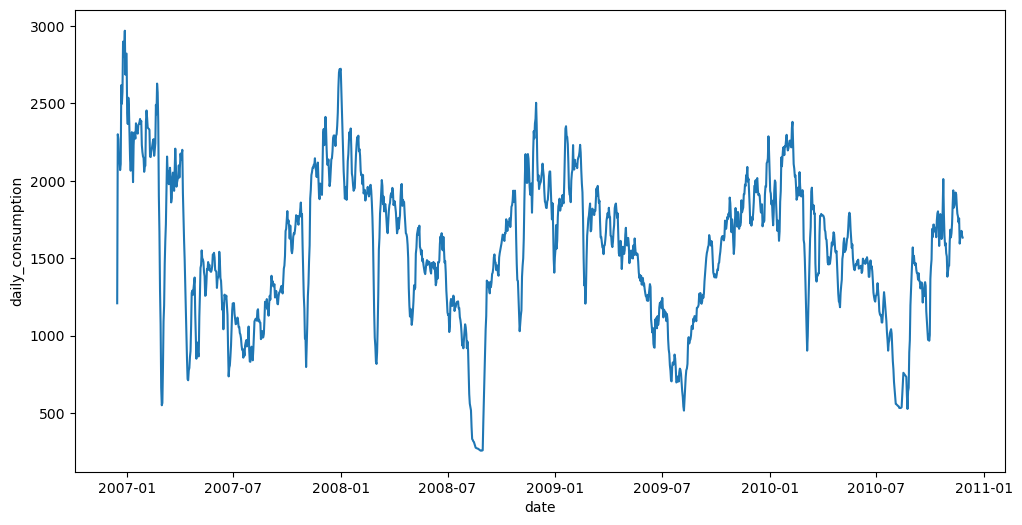

In [225]:
plt.figure(figsize=(12,6))
sns.lineplot(df_ts['daily_consumption'].rolling(window='7D').mean())

We can clearly see seasonality, where the consumption cost drops as expected. There are some anomalies, which we will examine in more detail later.

Now let's do the same with others features

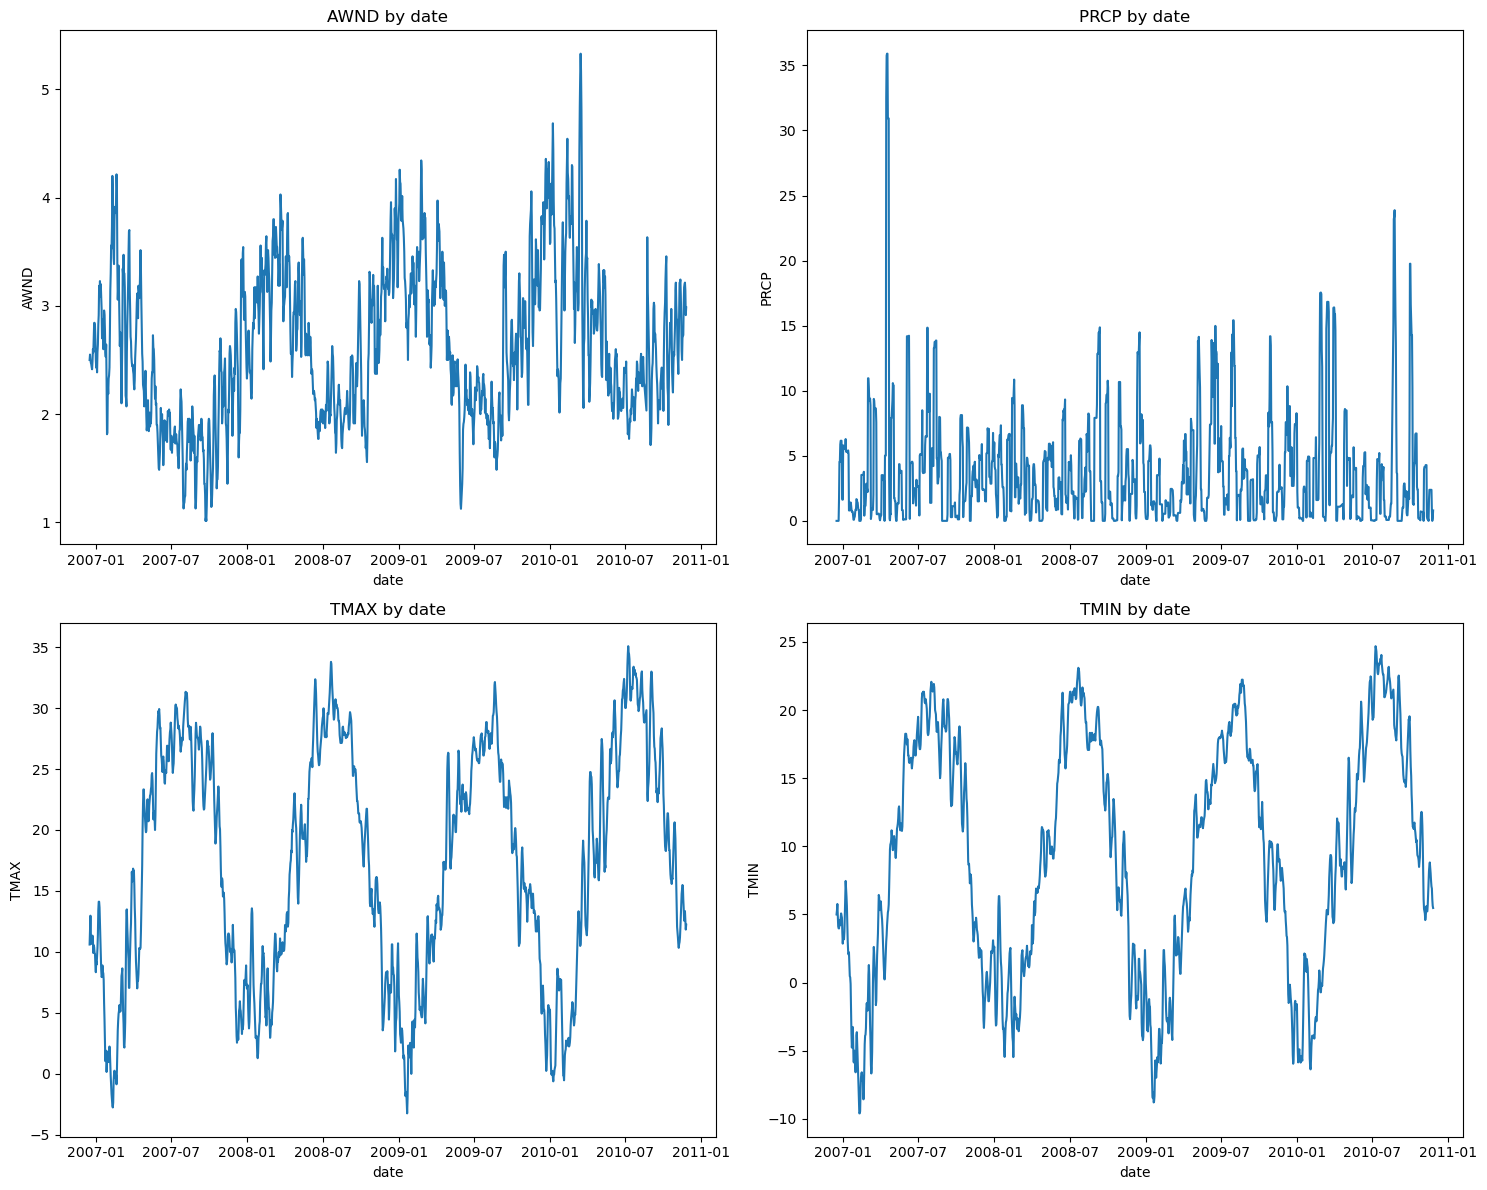

In [226]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

for ax, column in zip(axes.flatten(), df_ts.columns):
    sns.lineplot(
        df_ts[column].rolling(window='7D').mean(),
        ax=ax
    )
    
    ax.set_title(f'{column} by date')

plt.tight_layout()

TMAX and TMIN look really similiar, so they could be correlated. AWND grows up at winter, when TMAX and TMIN drop. It dosen't look PRCP matters. Propably it could be a disturbing variable and it affects on others features. We need to check it out using more math methods.

Now we'll use MinMaxScaler to limit feature values to (0, 1) range and we'll plot some features with daily consumption together.

In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm_ts = pd.DataFrame(
    scaler.fit_transform(df_ts[df_ts.index > '2007-02-01']),
    columns=df_ts.columns,
    index=df_ts[df_ts.index > '2007-02-01'].index
)

df_norm_ts.head()

,AWND,PRCP,TMAX,TMIN,daily_consumption
date,,,,,
2007-02-02,0.147059,0.030161,0.252588,0.346154,0.411783
2007-02-03,0.382353,0.000000,0.219462,0.225962,1.000000
2007-02-04,0.441176,0.000000,0.138716,0.146635,0.891973
2007-02-05,0.490196,0.000000,0.022774,0.026442,0.406191
2007-02-06,0.392157,0.000000,0.103520,0.064904,0.313600


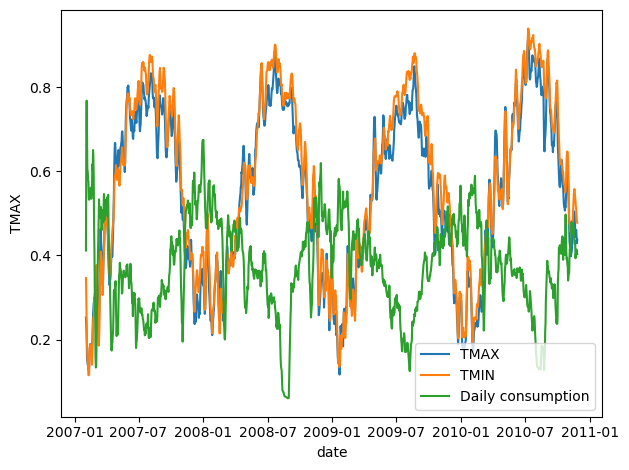

In [228]:
df_norm_ts_window = df_norm_ts.rolling(window='7D').mean()



sns.lineplot(df_norm_ts_window, x='date', y='TMAX', label='TMAX')
sns.lineplot(df_norm_ts_window, x='date', y='TMIN', label='TMIN')
sns.lineplot(df_norm_ts_window, x='date', y='daily_consumption', label='Daily consumption')

plt.legend()

plt.tight_layout()

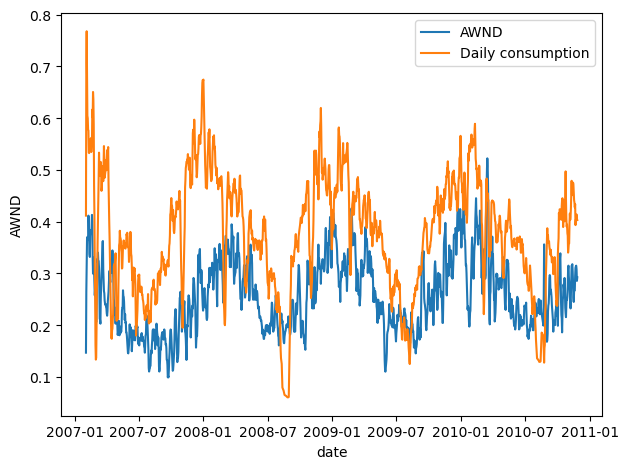

In [229]:
sns.lineplot(df_norm_ts_window, x='date', y='AWND', label='AWND')
sns.lineplot(df_norm_ts_window, x='date', y='daily_consumption', label='Daily consumption')

plt.legend()
plt.tight_layout()

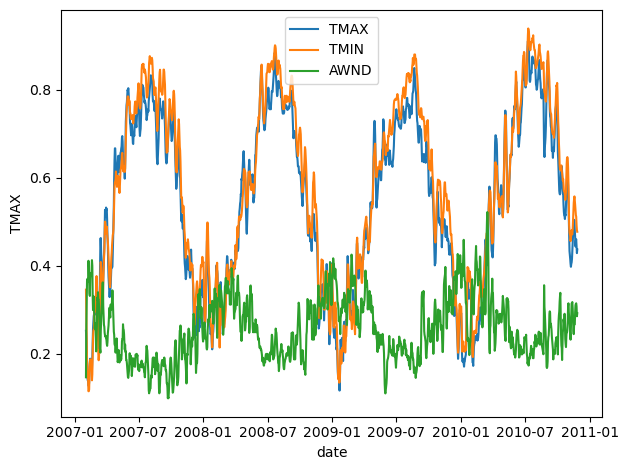

In [230]:
sns.lineplot(df_norm_ts_window, x='date', y='TMAX', label='TMAX')
sns.lineplot(df_norm_ts_window, x='date', y='TMIN', label='TMIN')
sns.lineplot(df_norm_ts_window, x='date', y='AWND', label='AWND')

plt.tight_layout()

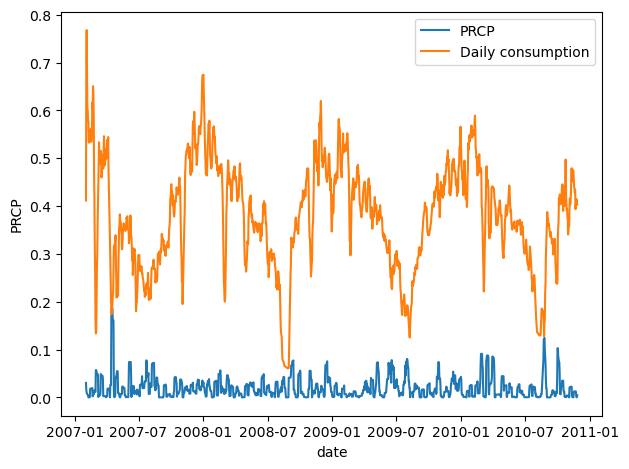

In [231]:
sns.lineplot(df_norm_ts_window, x='date', y='PRCP', label='PRCP')
sns.lineplot(df_norm_ts_window, x='date', y='daily_consumption', label='Daily consumption')

plt.legend()
plt.tight_layout()

Now let's check which feature affects on daily consumption. First we'll use a StandardScaler from sklearn, adnd then use OLS from statsmodels

In [232]:
df_ts['daily_consumption'] = df_ts['daily_consumption'].shift(1)
df_ts = df_ts[df_ts.index >= '2007-02-01']

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_size = int(len(df_ts) * .85)

train_df, test_df = df_ts.iloc[:train_size], df_ts.iloc[train_size:]
scaler = StandardScaler().fit(train_df)


train_df = pd.DataFrame(
    scaler.transform(train_df),
    columns=train_df.columns,
    index=train_df.index
)

test_df = pd.DataFrame(
    scaler.transform(test_df),
    columns=test_df.columns,
    index=test_df.index
)

# df_scaled_ts = pd.DataFrame(
#     scaler.fit_transform(df_ts),
#     columns=df_ts.columns,
#     index=df_ts.index
# )

In [234]:
import statsmodels.formula.api as smf

model = smf.ols('daily_consumption ~ AWND + PRCP + TMAX + TMIN', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      daily_consumption   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     121.7
Date:               czw., 05 lut 2026   Prob (F-statistic):           6.19e-87
Time:                        18:31:16   Log-Likelihood:                -1467.0
No. Observations:                1178   AIC:                             2944.
Df Residuals:                    1173   BIC:                             2969.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.776e-16      0.025   1.13e-14      1.000      -0.048       0.048
AWND           0.0132      0.029      0.454      0.650      -0.044       0.070
PRCP          -0.0735      0.025     -2.919      0.004      -0.123      -0.024
TMAX          -0.2282      0.084     -2.714      0.007      -0.393      -0.063
TMIN          -0.3063      0.084     -3.664      0.000      -0.470      -0.142
==============================================================================
Omnibus:                       28.425   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.492
Skew:                           0.117   Prob(JB):                     8.91e-13
Kurtosis:                       4.037   Cond. No.                         7.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
model = smf.ols('TMAX ~ TMIN', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TMAX   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:               czw., 05 lut 2026   Prob (F-statistic):               0.00
Time:                        18:31:17   Log-Likelihood:                -242.46
No. Observations:                1178   AIC:                             488.9
Df Residuals:                    1176   BIC:                             499.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.447e-16      0.009   1.67e-14      1.000      -0.017       0.017
TMIN           0.9548      0.009    110.144      0.000       0.938       0.972
==============================================================================
Omnibus:                       53.017   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.269
Skew:                           0.506   Prob(JB):                     8.18e-14
Kurtosis:                       3.451   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TMIN dosen't affect on target (P > |t| is >= .05), because TMAX and TMIN are well correlated (r^2 = 0.972), so we'll drop out TMIN and check again.

In [236]:
model = smf.ols('daily_consumption ~ AWND + PRCP + TMAX', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      daily_consumption   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     156.2
Date:               czw., 05 lut 2026   Prob (F-statistic):           3.50e-85
Time:                        18:31:17   Log-Likelihood:                -1473.7
No. Observations:                1178   AIC:                             2955.
Df Residuals:                    1174   BIC:                             2976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.776e-16      0.025   1.12e-14      1.000      -0.048       0.048
AWND           0.0191      0.029      0.653      0.514      -0.038       0.076
PRCP          -0.0879      0.025     -3.512      0.000      -0.137      -0.039
TMAX          -0.5178      0.029    -17.926      0.000      -0.574      -0.461
==============================================================================
Omnibus:                       29.166   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.194
Skew:                           0.151   Prob(JB):                     1.71e-12
Kurtosis:                       4.006   Cond. No.                         1.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see TMAX has most higher influence on daily consumption.  Let's check if AWND affects on TMAX

In [237]:
model = smf.ols('TMAX ~ AWND  ', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TMAX   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     425.0
Date:               czw., 05 lut 2026   Prob (F-statistic):           7.41e-81
Time:                        18:31:17   Log-Likelihood:                -1489.8
No. Observations:                1178   AIC:                             2984.
Df Residuals:                    1176   BIC:                             2994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.447e-16      0.025   5.79e-15      1.000      -0.049       0.049
AWND          -0.5152      0.025    -20.616      0.000      -0.564      -0.466
==============================================================================
Omnibus:                       39.324   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.738
Skew:                          -0.294   Prob(JB):                     3.49e-07
Kurtosis:                       2.491   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
model = smf.ols('TMAX ~ AWND', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TMAX   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     425.0
Date:               czw., 05 lut 2026   Prob (F-statistic):           7.41e-81
Time:                        18:31:17   Log-Likelihood:                -1489.8
No. Observations:                1178   AIC:                             2984.
Df Residuals:                    1176   BIC:                             2994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.447e-16      0.025   5.79e-15      1.000      -0.049       0.049
AWND          -0.5152      0.025    -20.616      0.000      -0.564      -0.466
==============================================================================
Omnibus:                       39.324   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.738
Skew:                          -0.294   Prob(JB):                     3.49e-07
Kurtosis:                       2.491   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r^2 ar ~0,5, but we can see that AWND has strong impact on TMAX. In addition do that, both has negative affect on daily consumption. Let's drop it from general model and try to fit again

In [239]:
model = smf.ols('daily_consumption ~  PRCP + TMAX+ AWND', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      daily_consumption   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     156.2
Date:               czw., 05 lut 2026   Prob (F-statistic):           3.50e-85
Time:                        18:31:17   Log-Likelihood:                -1473.7
No. Observations:                1178   AIC:                             2955.
Df Residuals:                    1174   BIC:                             2976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.776e-16      0.025   1.12e-14      1.000      -0.048       0.048
PRCP          -0.0879      0.025     -3.512      0.000      -0.137      -0.039
TMAX          -0.5178      0.029    -17.926      0.000      -0.574      -0.461
AWND           0.0191      0.029      0.653      0.514      -0.038       0.076
==============================================================================
Omnibus:                       29.166   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.194
Skew:                           0.151   Prob(JB):                     1.71e-12
Kurtosis:                       4.006   Cond. No.                         1.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TMAX's Std err droped down, so that's good. r^2 dosen't change, so we can assume that AWND was a distrubing variable. PRCP affect dosen't change.

In [240]:
model = smf.ols('daily_consumption ~  PRCP + TMAX', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      daily_consumption   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     234.2
Date:               czw., 05 lut 2026   Prob (F-statistic):           2.50e-86
Time:                        18:31:17   Log-Likelihood:                -1473.9
No. Observations:                1178   AIC:                             2954.
Df Residuals:                    1175   BIC:                             2969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.741e-16      0.025   1.11e-14      1.000      -0.048       0.048
PRCP          -0.0852      0.025     -3.452      0.001      -0.134      -0.037
TMAX          -0.5276      0.025    -21.386      0.000      -0.576      -0.479
==============================================================================
Omnibus:                       29.235   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.251
Skew:                           0.153   Prob(JB):                     1.66e-12
Kurtosis:                       4.006   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

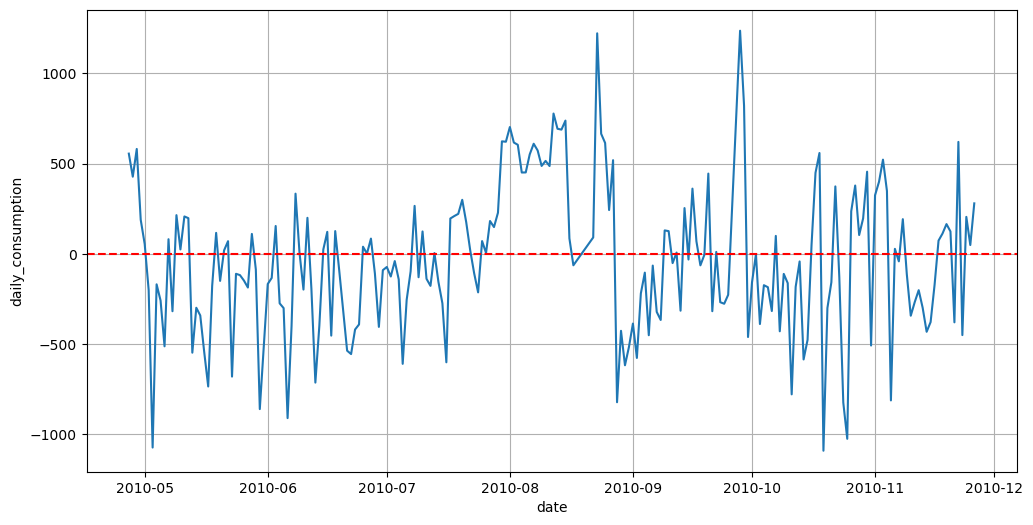

In [266]:

preds_scaled = model.predict(test_df)

tmp_test = test_df.copy()
tmp_preds = test_df.copy()

tmp_preds['daily_consumption'] = preds_scaled

df_test_unscaled = pd.DataFrame(scaler.inverse_transform(tmp_test), columns=test_df.columns, index=test_df.index)
df_preds_unscaled = pd.DataFrame(scaler.inverse_transform(tmp_preds), columns=test_df.columns, index=test_df.index)

residuals_unscaled = df_preds_unscaled['daily_consumption'] - df_test_unscaled['daily_consumption']


plt.figure(figsize=(12, 6))
sns.lineplot(data=residuals_unscaled)
plt.axhline(0, color='red', linestyle='--')
plt.grid()
plt.show()

A lot of predictions are behind (-500, 500) range. Perhaps there is no linear correlation. Let's try do the same but with XGBRegressor. We will leave AWND this time and do some feature engineering.

In [244]:
from xgboost import XGBRegressor

df_for_XGBReg = df_ts.copy()
df_for_XGBReg['month'] = df_for_XGBReg.index.month
df_for_XGBReg['day_of_week'] = df_for_XGBReg.index.dayofweek
df_for_XGBReg['is_weekend'] = df_for_XGBReg['day_of_week'].isin([5,6]).astype(int)

In [245]:
df_for_XGBReg

,AWND,PRCP,TMAX,TMIN,daily_consumption,month,day_of_week,is_weekend
date,,,,,,,,
2007-02-01,2.4,0.0,1.1,-3.3,2363.752,2,3,0
2007-02-02,1.5,5.8,3.3,0.0,1824.760,2,4,0
2007-02-03,3.9,0.0,1.7,-5.0,1667.736,2,5,1
2007-02-04,4.5,0.0,-2.2,-8.3,4029.722,2,6,1
2007-02-05,5.0,0.0,-7.8,-13.3,3595.940,2,0,0
...,...,...,...,...,...,...,...,...
2010-11-22,2.7,0.0,18.3,7.2,900.910,11,0,0
2010-11-23,3.1,0.0,16.1,10.0,2041.536,11,1,0
2010-11-24,4.3,0.0,10.0,5.0,1577.536,11,2,0


In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_for_XGBReg.drop(columns=['daily_consumption']), df_for_XGBReg['daily_consumption'])

In [247]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Inicjalizacja modelu
xgb_model = XGBRegressor(
    n_estimators=1000, # liczba drzew
    learning_rate=0.05, 
    max_depth=5,       # głębokość drzewa
    early_stopping_rounds=50 # stop, jeśli model przestanie się poprawiać
)

# Dopasowanie (X_train i y_train muszą być przygotowane)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Prognoza
predictions = xgb_model.predict(X_test)

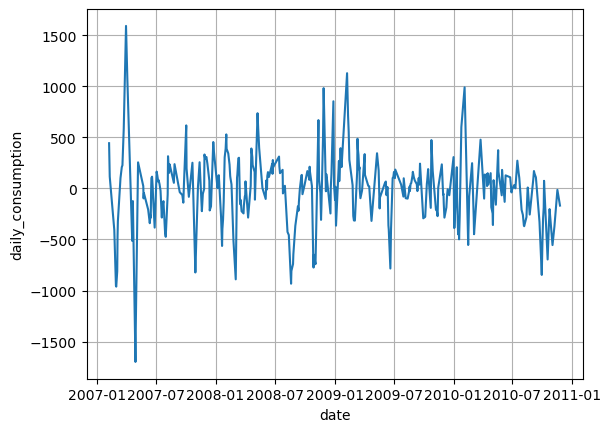

In [262]:
residuals = pd.Series(y_test - predictions, index=y_test.index)
residuals = residuals.sort_index()

sns.lineplot(residuals.rolling(window='7D').mean())

plt.grid()

There is much better. Of course that is not beautiful, we could try use neural networks like GRU or LSTM, but that enough for this analyze.